# Data Understanding

Getting familiar with the data, identify data quality problems

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb
from scipy import stats
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go #pip install plotly

#Preprocess
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

In [2]:
#Read the analytics csv file and merge all the dataset into a dataframe called "df"
a = pd.read_csv('/Users/elisapashku/Desktop/Pisa/DmProject/Train_HR_Employee_Attrition.csv')
b = pd.read_csv('/Users/elisapashku/Desktop/Pisa/DmProject/Test_HR_Employee_Attrition.csv')
df = pd.concat([a,b])
# Make a copy of the dataframe where we will make changes 
df_cleaned=df.copy()

### 1.1 Data Semantics

In [3]:
# The dataset contains 33 columns and 1470 observations
df.shape

(1470, 33)

In [4]:
# Check types of features and data integrity (whether we have missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 293
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1258 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1339 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1395 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatisf

In [5]:
# Checking the first 5 rows of the dataset
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  52.0        No      Travel_Rarely        593  Research & Development   
1  36.0        No      Travel_Rarely       1218  Research & Development   
2   NaN        No  Travel_Frequently        530                   Sales   
3  33.0        No      Travel_Rarely        953  Research & Development   
4   NaN        No      Travel_Rarely       1380  Research & Development   

   DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
0                 9          4           Medical                        2   
1                 1          1     Life Sciences                        2   
2                16          3     Life Sciences                        3   
3                 5          4  Technical Degree                        2   
4                 9          2     Life Sciences                        3   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0    Male  ...                         3           80.0                 0   
1    Male  ...                         3           80.0                 1   
2     NaN  ...                         3            NaN                 1   
3    Male  ...                         2            NaN                 0   
4  Female  ...                         3           80.0                 0   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                20                    2.0               2             8.0   
1                21                    3.0               3             1.0   
2                 7                    4.0               3             1.0   
3                12                    1.0               3             3.0   
4                 2                    NaN               3            10.0   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   7                        2                   13  
1                   8                        1                    6  
2                   5                        1                    2  
3                   7                        0                    7  
4                   2                        2                    1  

[5 rows x 33 columns]

In [6]:
# Find unique values of categorical attributes
disc_col = []
for column in df.columns:
    if df[column].dtypes == object :
        print(f"{column} : \t {df[column].unique()}")
        disc_col.append(column)
        print("====================================")

Attrition : 	 ['No' 'Yes']
BusinessTravel : 	 ['Travel_Rarely' 'Travel_Frequently' nan 'Non-Travel']
Department : 	 ['Research & Development' 'Sales' 'Human Resources']
EducationField : 	 ['Medical' 'Life Sciences' 'Technical Degree' 'Other' 'Human Resources'
 'Marketing']
Gender : 	 ['Male' nan 'Female']
JobRole : 	 ['Research Director' 'Manager' 'Sales Executive' 'Research Scientist'
 'Laboratory Technician' 'Sales Representative' 'Manufacturing Director'
 'Healthcare Representative' 'Human Resources']
MaritalStatus : 	 ['Single' 'Divorced' 'Married']
Over18 : 	 [nan 'Y']
OverTime : 	 ['No' 'Yes']


In [7]:
# Array with numerical features
numerical_cols= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                                    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                                   'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                                    'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsWithCurrManager' ]

In [8]:
# Array with categorical features
categorical_cols=['OverTime', 'Gender', 'BusinessTravel', 'Education', 'EducationField', 'Department',
      'EnvironmentSatisfaction', 'JobLevel','JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 
      'RelationshipSatisfaction']

In [9]:
#Find the range of HourlyRate
for col in numerical_cols:
    c=df[col].unique()
    c.sort(axis=0)
    print(f"{col} has: {c} unique values" )

Age has: [18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. nan] unique values
DailyRate has: [ 102  103  104  105  106  107  109  111  115  116  117  118  119  120
  121  124  125  128  129  130  131  132  134  135  136  138  140  141
  142  143  144  145  146  147  148  150  152  153  154  155  156  157
  160  161  163  164  167  168  170  172  174  176  177  179  180  181
  182  185  188  189  192  193  194  195  196  199  200  201  202  203
  204  205  206  207  208  210  211  213  216  217  218  219  224  228
  230  231  232  234  237  238  240  241  243  244  247  248  249  251
  252  253  254  256  258  261  263  264  265  266  267  268  269  271
  277  279  280  282  285  286  287  288  289  290  294  296  299  300
  301  302  303  304  305  306  307  309  310  311  313  314  316  317
  318  319  322  325  326  328  329  330  332  333  334  335  336  337
 

In [10]:
# Check for duplicates
dup=df_cleaned.drop_duplicates()
dup.shape

(1470, 33)

In [11]:
#Statistical properties only for numerical attributes
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1258.000000  1470.000000       1470.000000  1470.000000   
mean     37.115262   802.485714          9.192517     2.912925   
std       9.068654   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  RelationshipSatisfaction  \
count      1470.000000    1190.000000  ...               1470.000000   
mean          2.728571    6548.915966  ...                  2.712245   
std           1.102846    4732.775331  ...                  1.081209   
min           1.000000    1009.000000  ...                  1.000000   
25%           2.000000    2973.250000  ...                  2.000000   
50%           3.000000    4907.500000  ...                  3.000000   
75%           4.000000    8437.500000  ...                  4.000000   
max           4.000000   19999.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count          753.0       1470.000000        1470.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1178.000000      1470.000000     1396.000000   
mean                2.810696         2.761224        6.942693   
std                 1.302499         0.706476        6.033444   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

In [12]:
# Include only string columns in thge description
df.describe(include=[object])

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1339                    1470           1470   1395   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233            947                     961            606    841   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1002     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1002     1054

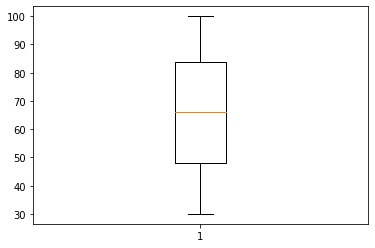

In [13]:
plt.boxplot(df["HourlyRate"])
plt.show()

### 1.2 Distribution of the variables and statistics

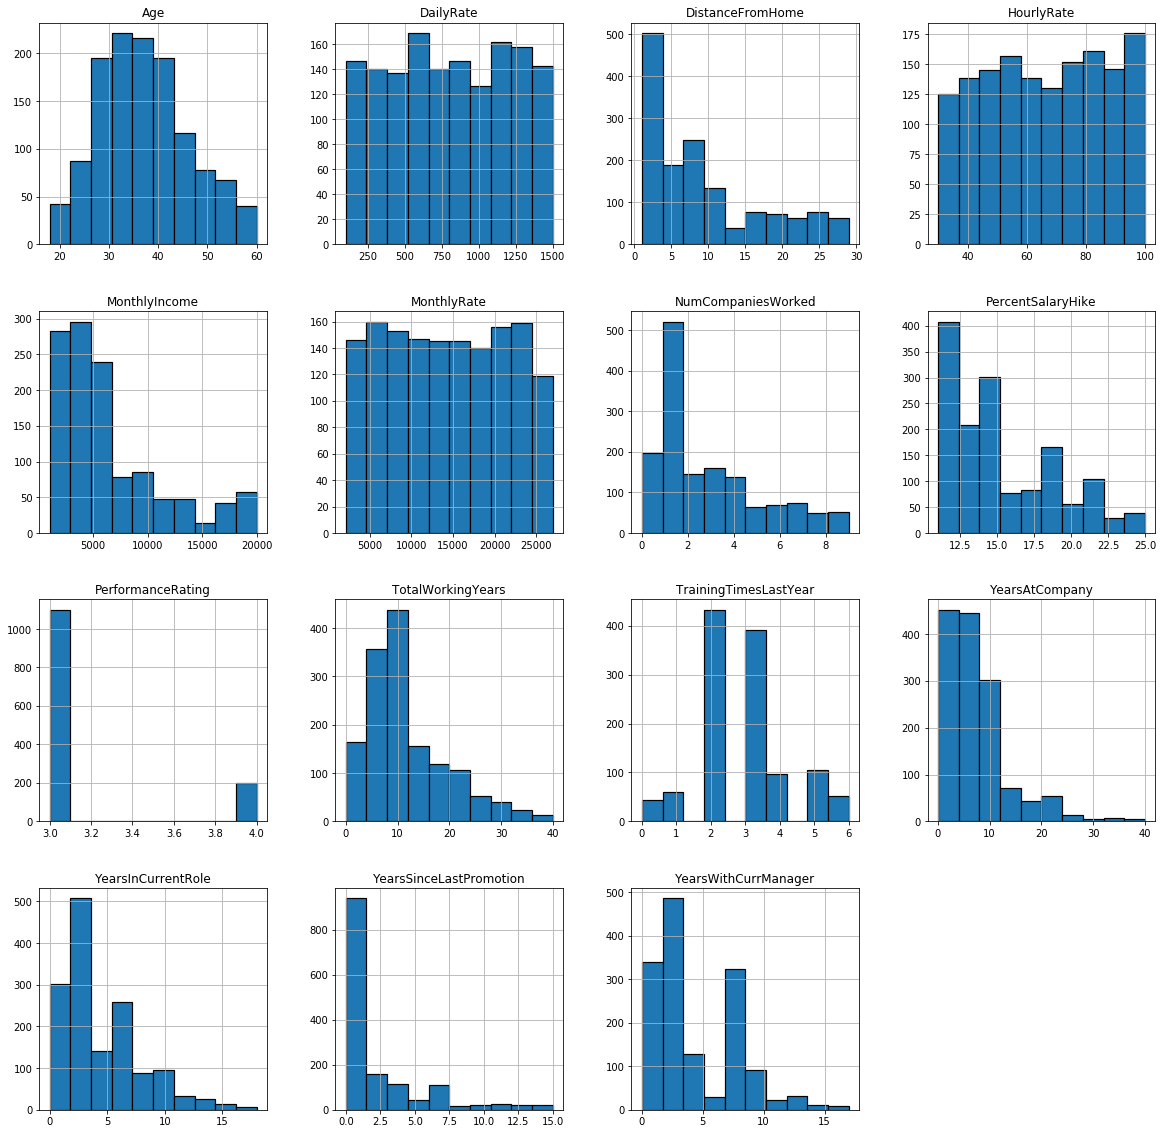

In [14]:
# Visulazing the distibution of numerical data using histograms
df.hist(edgecolor='black', column= numerical_cols, linewidth=1.2, figsize=(20, 20));

(array([0, 1]), <a list of 2 Text xticklabel objects>)

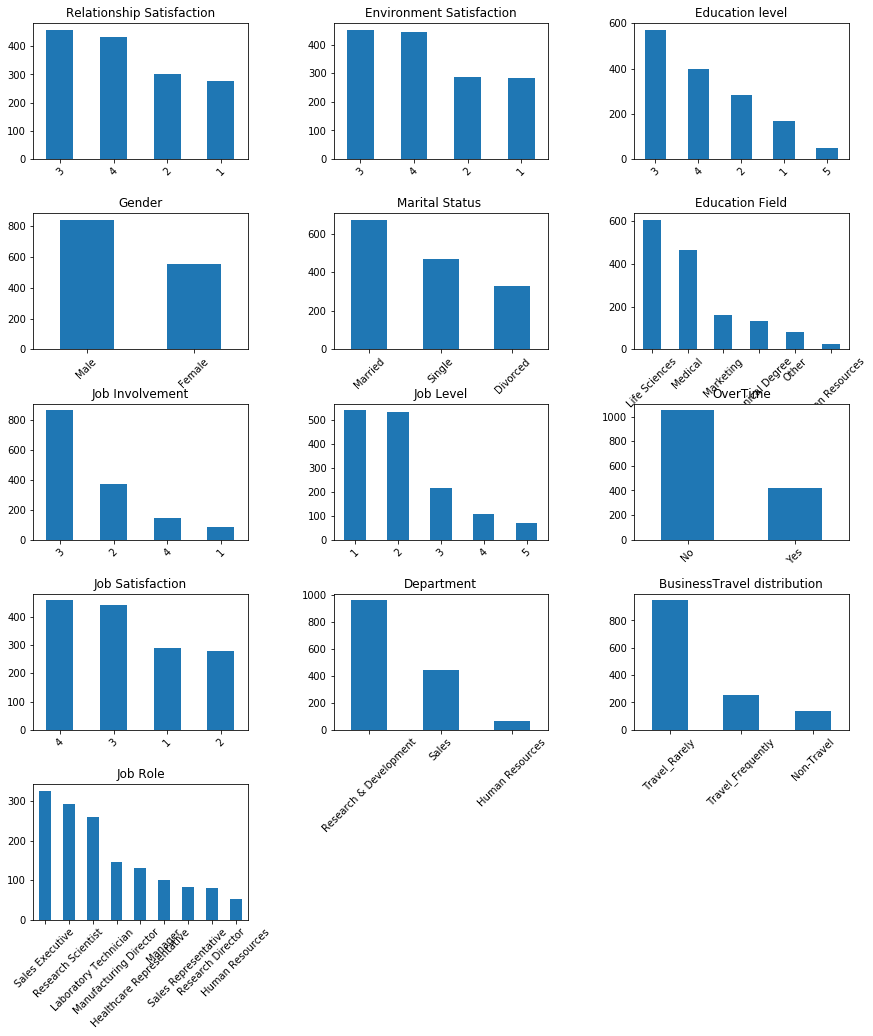

In [15]:
#Bar plots for categorical features

# Set up a grid of plots
fig = plt.figure(figsize=(20,20))
fig_dims = (6,4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Plot Business Travel
plt.subplot2grid(fig_dims, (3,2))
df['BusinessTravel'].value_counts().plot(kind='bar', title='BusinessTravel distribution')
plt.xticks(rotation=45)

#Plot Department 
plt.subplot2grid(fig_dims, (3,1))
df['Department'].value_counts().plot(kind='bar', title='Department')
plt.xticks(rotation=45)

#Plot Education Level 
plt.subplot2grid(fig_dims, (0,2))
df['Education'].value_counts().plot(kind='bar', title='Education level')
plt.xticks(rotation=45)

#Plot Education Field
plt.subplot2grid(fig_dims, (1,2))
df['EducationField'].value_counts().plot(kind='bar', title='Education Field')
plt.xticks(rotation=45)

#Plot Environment Satisfaction
plt.subplot2grid(fig_dims, (0,1))
df['EnvironmentSatisfaction'].value_counts().plot(kind='bar', title='Environment Satisfaction')
plt.xticks(rotation=45)

#Plot Gender
plt.subplot2grid(fig_dims, (1,0))
df['Gender'].value_counts().plot(kind='bar', title='Gender')
plt.xticks(rotation=45)

#Plot Job Involvement
plt.subplot2grid(fig_dims, (2,0))
df['JobInvolvement'].value_counts().plot(kind='bar', title='Job Involvement')
plt.xticks(rotation=45)

#Plot Job Level
plt.subplot2grid(fig_dims, (2,1))
df['JobLevel'].value_counts().plot(kind='bar', title='Job Level')
plt.xticks(rotation=45)
   
#Plot Job Role
plt.subplot2grid(fig_dims, (4,0))
df['JobRole'].value_counts().plot(kind='bar', title='Job Role')
plt.xticks(rotation=45)
   
#Plot Job Satisfaction
plt.subplot2grid(fig_dims, (3,0))
df['JobSatisfaction'].value_counts().plot(kind='bar', title='Job Satisfaction')
plt.xticks(rotation=45)
   
#Plot Marital Status 
plt.subplot2grid(fig_dims, (1,1))
df['MaritalStatus'].value_counts().plot(kind='bar', title='Marital Status ')
plt.xticks(rotation=45)

#Plot Realtionship satisfaction 
plt.subplot2grid(fig_dims, (0,0))
df['RelationshipSatisfaction'].value_counts().plot(kind='bar', title='Relationship Satisfaction')
plt.xticks(rotation=45)

#Plot Over Time
plt.subplot2grid(fig_dims, (2,2))
df['OverTime'].value_counts().plot(kind='bar', title='OverTime')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

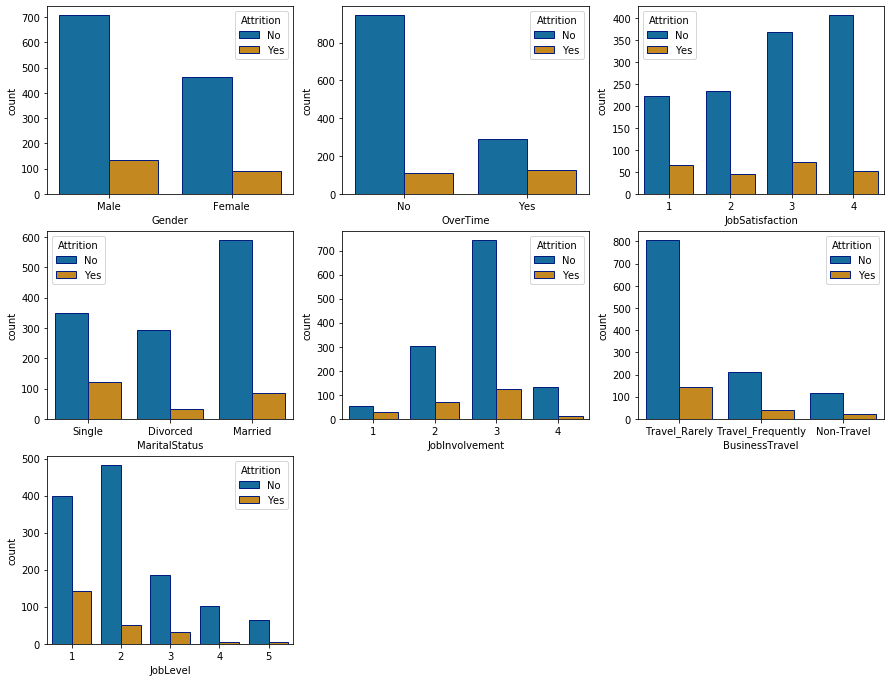

In [16]:
fig = plt.figure(figsize=(15,20))
fig_dims = (5,3)


#Plot Business Travel
plt.subplot2grid(fig_dims, (2,2))
sb.countplot(x='BusinessTravel', hue='Attrition', data = df, palette="colorblind",  edgecolor=sb.color_palette("dark", n_colors = 1))
plt.xticks(rotation=0)

#Plot Gender
plt.subplot2grid(fig_dims, (1,0))
sb.countplot(x='Gender', hue='Attrition', data = df, palette="colorblind",  edgecolor=sb.color_palette("dark", n_colors = 1))
plt.xticks(rotation=0)

#Plot Job Involvement
plt.subplot2grid(fig_dims, (2,1))
sb.countplot(x='JobInvolvement', hue='Attrition', data = df, palette="colorblind",  edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)

#Plot OverTime
plt.subplot2grid(fig_dims, (1,1))
sb.countplot(x='OverTime', hue='Attrition', data = df, palette="colorblind",  edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)

#Plot Marital Status
plt.subplot2grid(fig_dims, (2,0))
sb.countplot(x='MaritalStatus', hue='Attrition', data = df, palette="colorblind",  edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)

#Plot Job Satisfaction
plt.subplot2grid(fig_dims, (1,2))
sb.countplot(x='JobSatisfaction', hue='Attrition', data = df, palette="colorblind",  edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)

#Plot Job Level
plt.subplot2grid(fig_dims, (3,0))
sb.countplot(x='JobLevel', hue='Attrition', data = df, palette="colorblind",  edgecolor=sb.color_palette("dark", n_colors = 1));
plt.xticks(rotation=0)


/Users/elisapashku/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/elisapashku/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



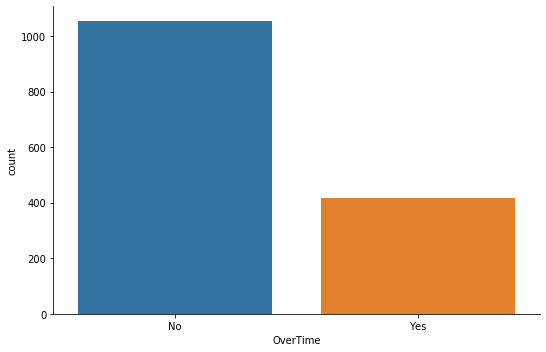

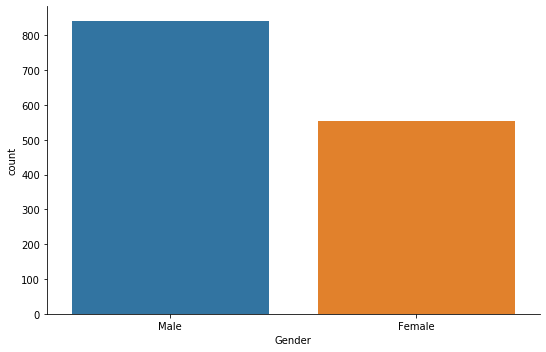

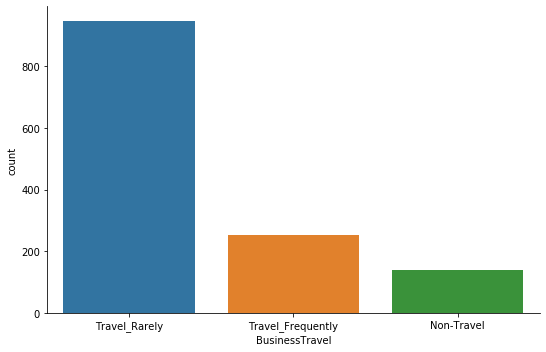

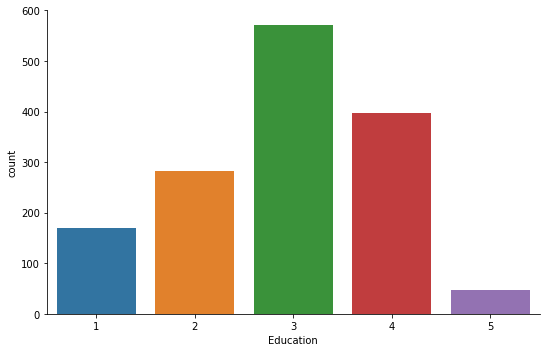

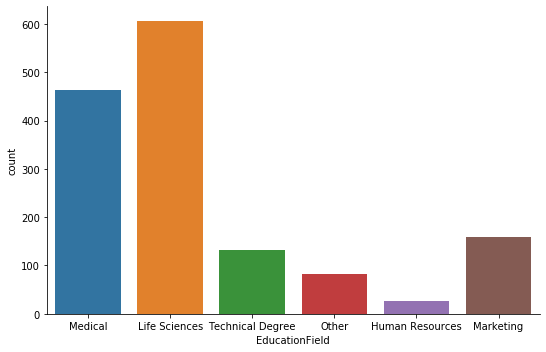

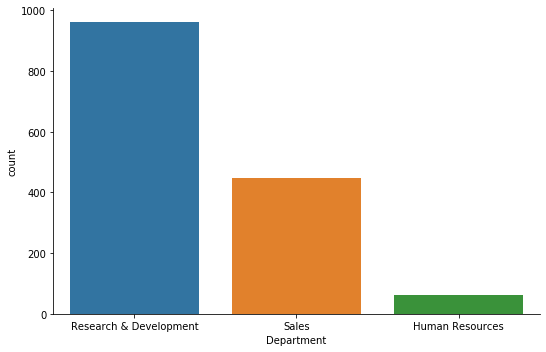

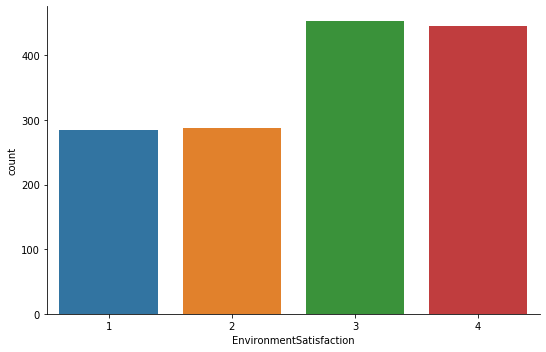

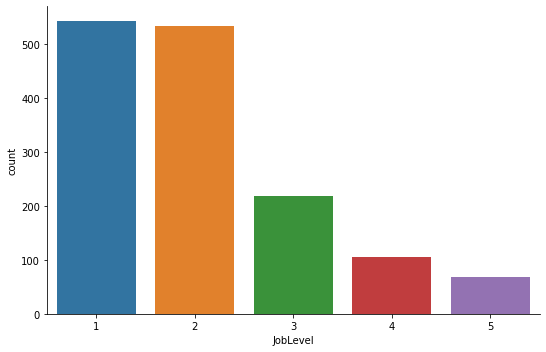

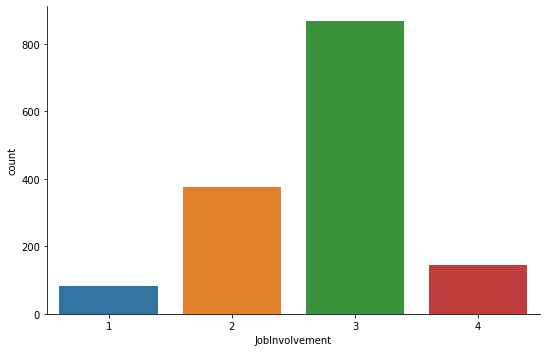

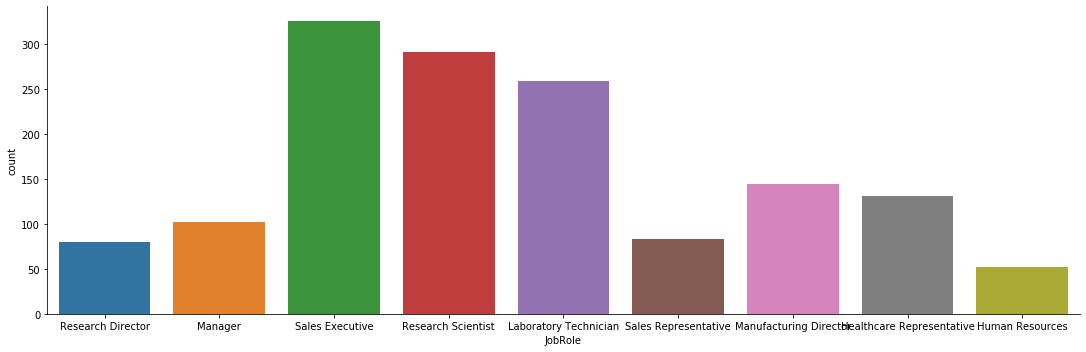

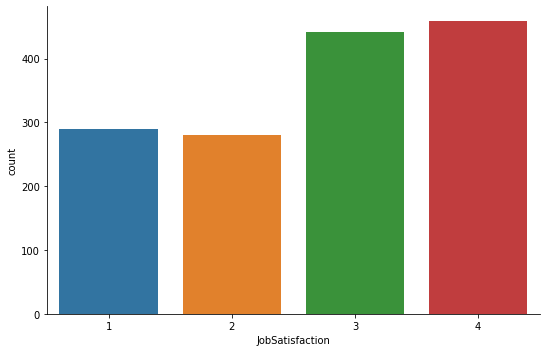

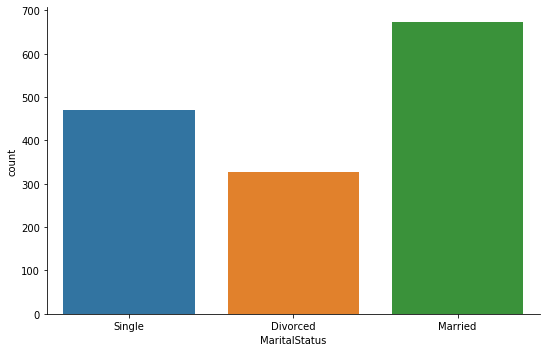

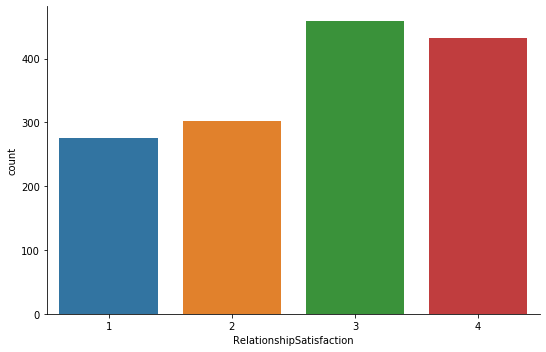

In [17]:
# Function for plotting the categorical features
def plot_categorical(attr,labels=None):
    if(attr=='JobRole'):
        sb.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sb.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

for col in categorical_cols:
    plot_categorical(col)

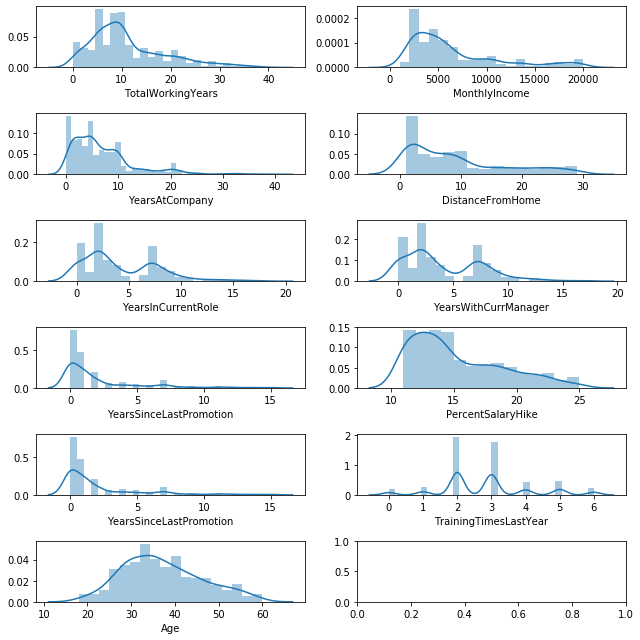

In [18]:
# Checking the distribution of numerical features
fig,ax = plt.subplots(6,2, figsize=(9,9))

sb.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sb.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sb.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sb.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sb.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sb.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sb.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sb.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sb.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sb.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
sb.distplot(df['Age'], ax = ax[5,0]) 

plt.tight_layout()
plt.show()

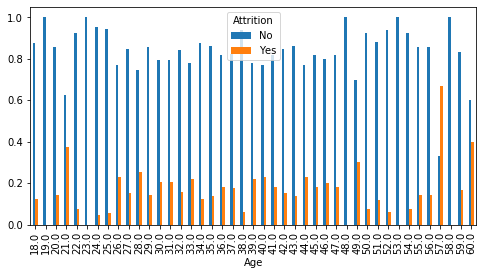

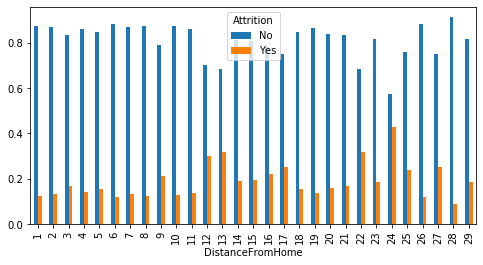

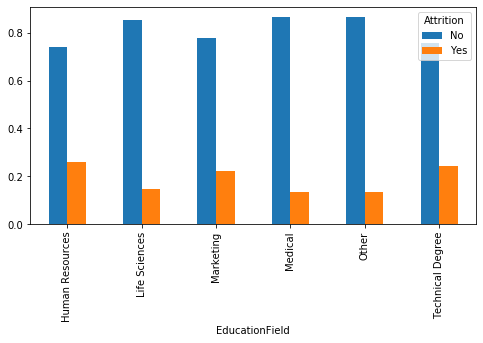

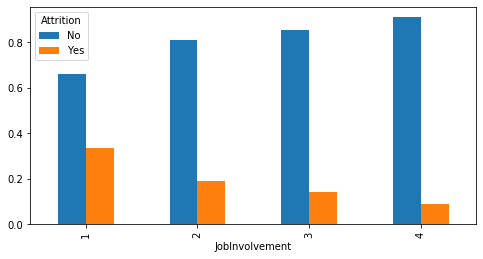

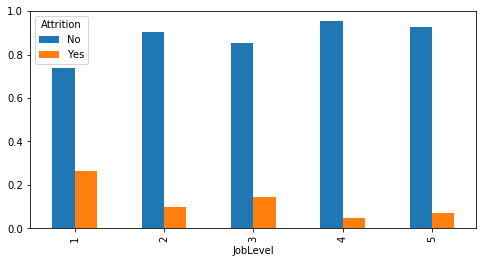

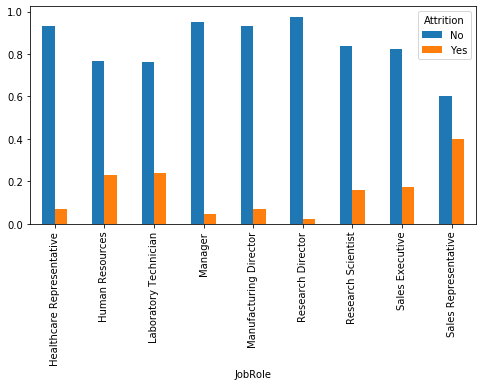

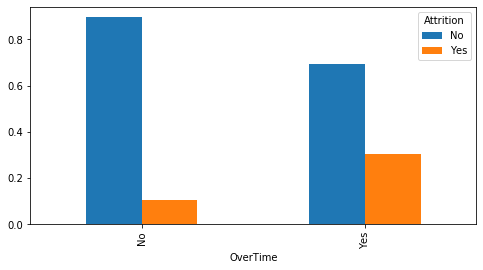

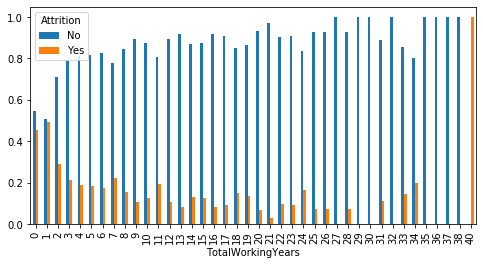

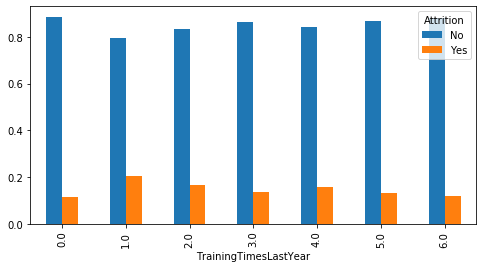

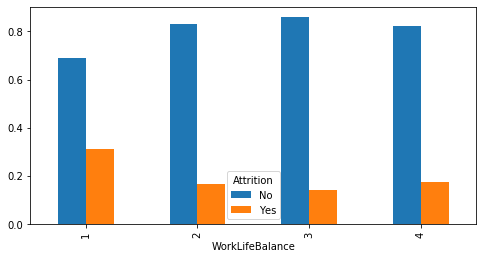

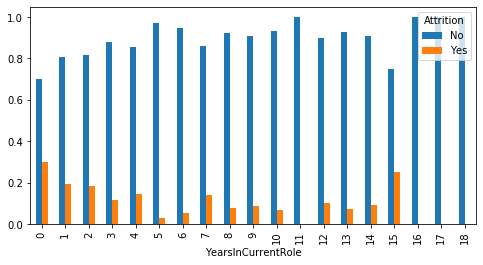

In [19]:
BarPlot_columns=['Age','DistanceFromHome','EducationField',
                'JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear',
                'WorkLifeBalance','YearsInCurrentRole']

#Method the perform Bar plots
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)
    
for col in BarPlot_columns:
    Bar_plots(col)

Text(0, 0.5, 'Attrition')

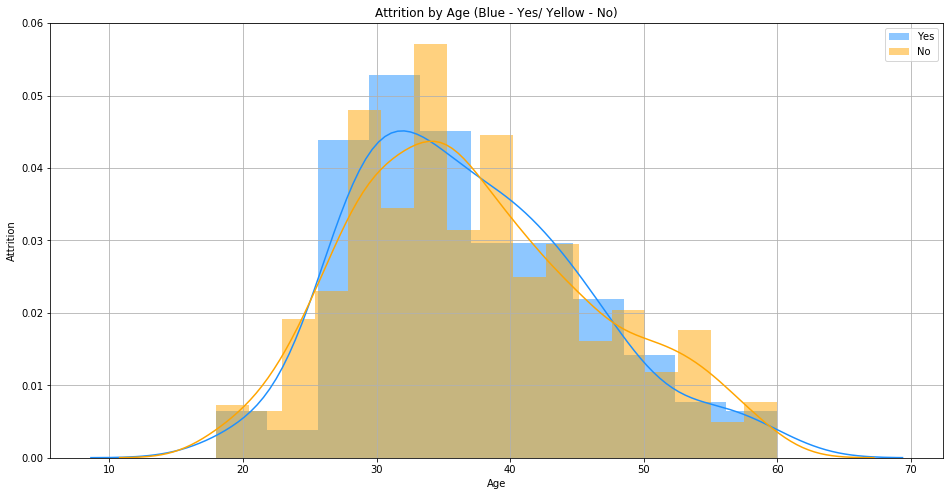

In [20]:
# Sort the dataframe by Age
df_no = df.loc[df['Attrition'] == 'No']
df_yes = df.loc[df['Attrition'] == 'Yes']

plt.figure(figsize=(16,8))
sb.distplot(df_yes[['Age']],color='dodgerblue', label="Yes", hist_kws={'alpha':.5})
sb.distplot(df_no[['Age']], color='orange', label="No", hist_kws={'alpha':.5})
plt.grid()
plt.legend()
plt.title('Attrition by Age (Blue - Yes/ Yellow - No)')
plt.xlabel('Age')
plt.ylabel('Attrition')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

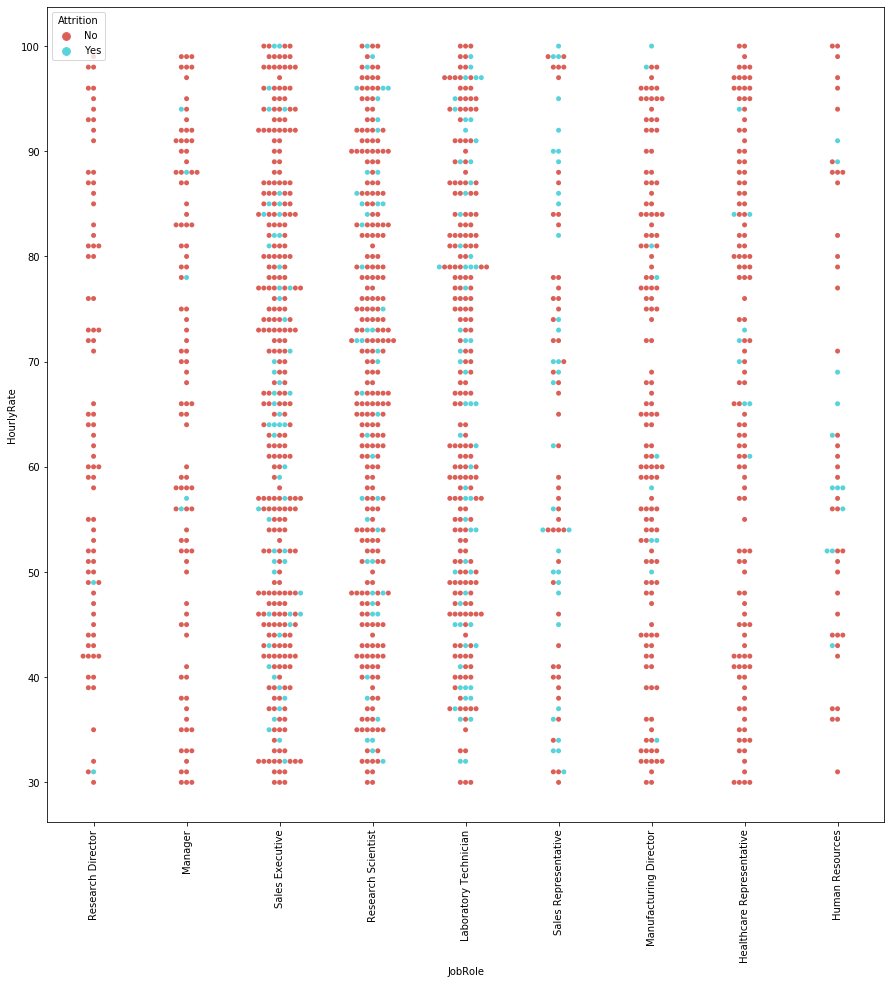

In [21]:
f,ax = plt.subplots(figsize = (15,15))
sb.swarmplot(x="JobRole",y="HourlyRate",hue="Attrition",data=df,palette="hls")
plt.xticks(rotation=90)

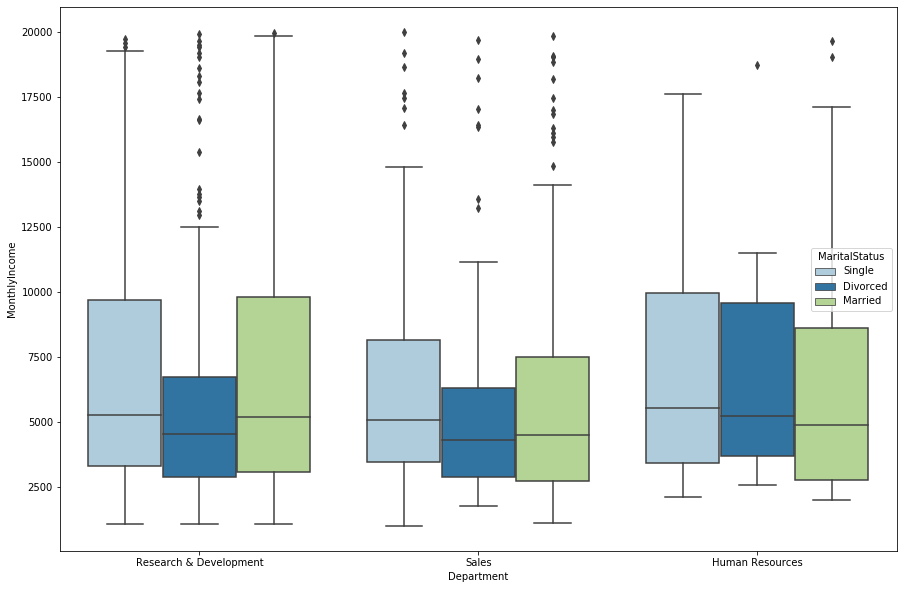

In [22]:
f,ax = plt.subplots(figsize = (15,10))
sb.boxplot(x="Department",y="MonthlyIncome",hue="MaritalStatus",data=df,palette="Paired")

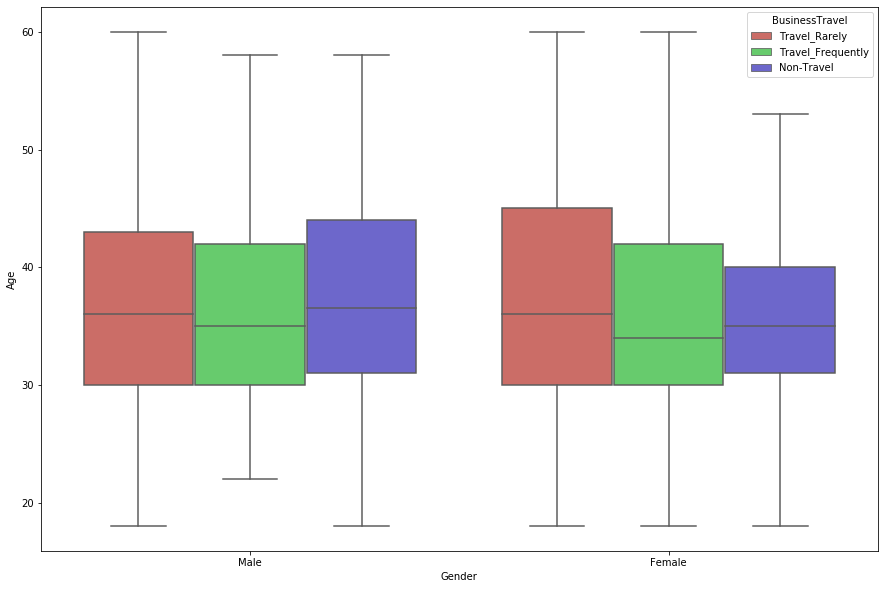

In [23]:
f,ax = plt.subplots(figsize = (15,10))
sb.boxplot(x="Gender",y="Age",hue="BusinessTravel",data=df,palette="hls")

Employees with age 28-36 have higher attrition rate

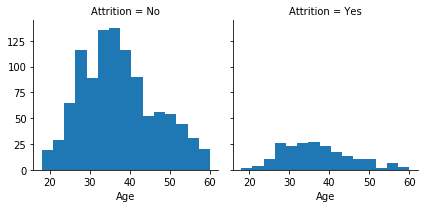

In [24]:
g = sb.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'Age', bins=15)

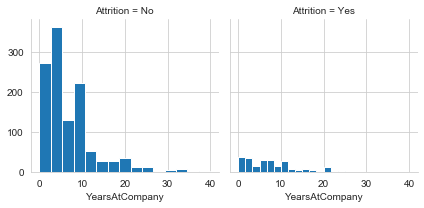

In [25]:
sb.set_style('whitegrid')
g = sb.FacetGrid(df, col='Attrition')
g.map(plt.hist, 'YearsAtCompany', bins=15)

Field of HR and Technical degrees have the highest attrition level.
Sales Representatives, Laboratory Technicians and HR roles have the highest attrition.

In [27]:
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x])

In [28]:
df[['EducationField', 'Attrition_numerical']].groupby(['EducationField'], as_index=False).mean().sort_values(by='Attrition_numerical', ascending=False)


EducationField  Attrition_numerical
0   Human Resources             0.259259
5  Technical Degree             0.242424
2         Marketing             0.220126
1     Life Sciences             0.146865
3           Medical             0.135776
4             Other             0.134146

In [29]:
df[['JobRole', 'Attrition_numerical']].groupby(['JobRole'], as_index=False).mean().sort_values(by='Attrition_numerical', ascending=False)

JobRole  Attrition_numerical
8       Sales Representative             0.397590
2      Laboratory Technician             0.239382
1            Human Resources             0.230769
7            Sales Executive             0.174847
6         Research Scientist             0.160959
4     Manufacturing Director             0.068966
0  Healthcare Representative             0.068702
3                    Manager             0.049020
5          Research Director             0.025000

In [30]:
# Crosstable of Gender and Attrition
gender_xt = pd.crosstab(df['Gender'], df['Attrition'])
gender_xt

Attrition   No  Yes
Gender             
Female     465   89
Male       707  134

In [31]:
# Pclass for Job Satisfaction
jsat_xt = pd.crosstab(df['JobSatisfaction'], df['Attrition'])
jsat_xt

Attrition         No  Yes
JobSatisfaction          
1                223   66
2                234   46
3                369   73
4                407   52

In [32]:
# Normalize the cross tab to sum to 1:
jsat_xt_pct = jsat_xt.div(jsat_xt.sum(1).astype(float), axis=0)
jsat_xt_pct

Attrition              No       Yes
JobSatisfaction                    
1                0.771626  0.228374
2                0.835714  0.164286
3                0.834842  0.165158
4                0.886710  0.113290

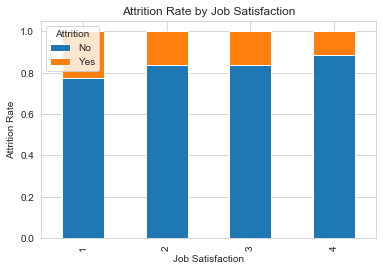

In [33]:
#Bar plots for Job Satisfaction Level
jsat_xt_pct.plot(kind='bar', stacked=True, 
                   title='Attrition Rate by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate')
plt.show()

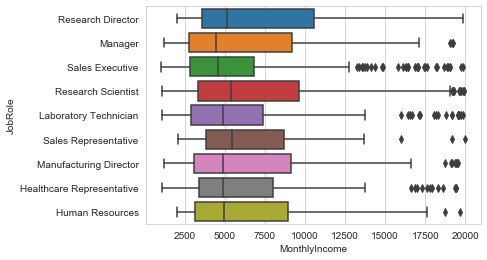

In [34]:
sb.boxplot(x='MonthlyIncome',y='JobRole',data=df)

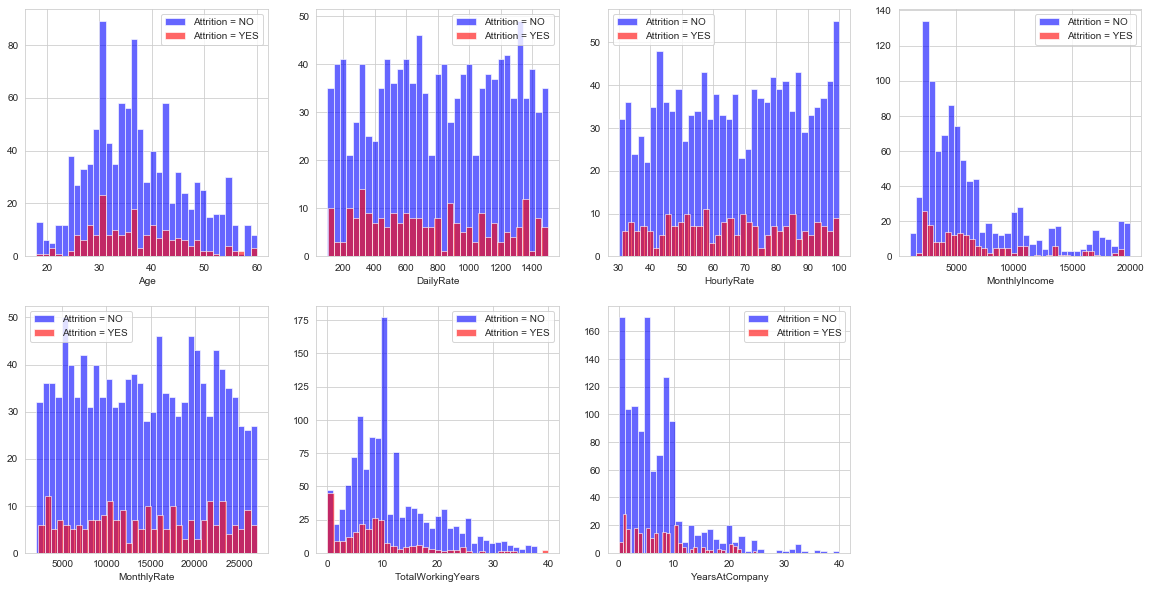

In [35]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        cont_col.append(column)
        
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 'No'][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 'Yes'][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

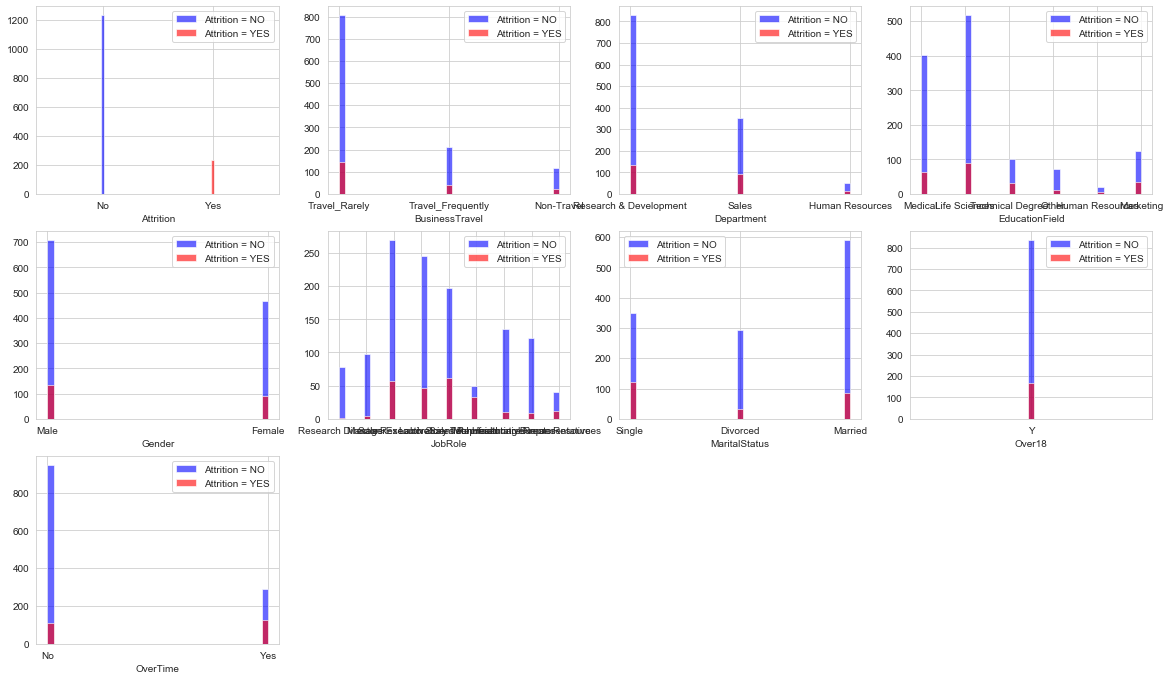

In [36]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(5, 4, i)
    df[df["Attrition"] == 'No'][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 'Yes'][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


- The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
- BusinessTravel : The workers who travel alot are more likely to quit then other employees.

- Department : The worker in Research & Development are more likely to stay then the workers on other departement.

- EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

- Gender : The Male are more likely to quit.

- JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

- MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

- OverTime : The workers who work more hours are likely to quit then others.

In [37]:
categorical_df=df.select_dtypes(exclude=np.number)
categorical_cols=list(categorical_df.columns)
for n in categorical_cols:
    print(pd.crosstab(df['Attrition'],df[n],normalize='columns'))
    print("====================================")

Attrition   No  Yes
Attrition          
No         1.0  0.0
Yes        0.0  1.0
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                 0.84058           0.834646       0.850053
Yes                0.15942           0.165354       0.149947
Department  Human Resources  Research & Development     Sales
Attrition                                                    
No                 0.809524                0.861602  0.793722
Yes                0.190476                0.138398  0.206278
EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
No                     0.740741       0.853135   0.779874  0.864224  0.865854   
Yes                    0.259259       0.146865   0.220126  0.135776  0.134146   

EducationField  Technical Degree  
Attrition                         
No                      0.757576 

In [38]:
attrition = df[(df['Attrition'] != 'No')]
no_attrition = df[(df['Attrition'] == 'No')]
def plot_pie(col) :
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[col].value_counts().values.tolist(),
                    labels  = attrition[col].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[col].value_counts().values.tolist(),
                    labels  = no_attrition[col].value_counts().keys().tolist(),
                    
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = col + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [39]:
plot_pie("Gender")
plot_pie('BusinessTravel')
plot_pie('JobSatisfaction')
plot_pie('Department')
plot_pie('MaritalStatus')
plot_pie('EducationField')
plot_pie('Education')

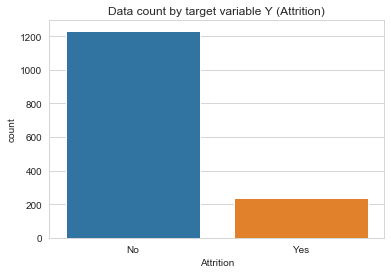

In [40]:
# Checking data imbalance
sb.countplot(x=df['Attrition'])
plt.title('Data count by target variable Y (Attrition)')
plt.show()

/Users/elisapashku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



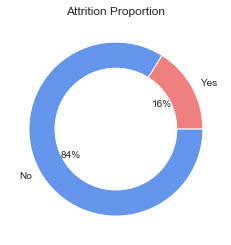

In [41]:
#RESULTS: Imbalanced data: 16% have left job, 84% have stayed

Y_count = len(df[df['Attrition'] == 'Yes'])
N_count = len(df[df['Attrition'] == 'No'])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

In [42]:
# Overview of summary (Attrition V.S. Non-Attrition)
attrition_Summary = df.groupby('Attrition')
attrition_Summary.mean()

Age   DailyRate  DistanceFromHome  Education  \
Attrition                                                       
No         37.173460  812.504461          8.915653   2.927007   
Yes        36.812808  750.362869         10.632911   2.839662   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
No                        2.771290   65.952149        2.770479  2.145985   
Yes                       2.464135   65.573840        2.518987  1.637131   

           JobSatisfaction  MonthlyIncome  ...  StandardHours  \
Attrition                                  ...                  
No                2.778589    6550.136727  ...           80.0   
Yes               2.468354    6542.409574  ...           80.0   

           StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
Attrition                                                               
No                 0.845093          11.862936               2.827173   
Yes                0.527426           8.244726               2.717514   

           WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition                                                        
No                2.781022        6.876385            4.484185   
Yes               2.658228        7.291480            2.902954   

           YearsSinceLastPromotion  YearsWithCurrManager  Attrition_numerical  
Attrition                                                                      
No                        2.234388              4.367397                  0.0  
Yes                       1.945148              2.852321                  1.0  

[2 rows x 25 columns]

In [43]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True, normalize='index') 

Attrition              No       Yes
JobSatisfaction                    
1                0.771626  0.228374
2                0.835714  0.164286
3                0.834842  0.165158
4                0.886710  0.113290
All              0.838776  0.161224

Entry level employees tend to leave the job more

In [44]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True, normalize='index') 

Attrition        No       Yes
JobLevel                     
1          0.736648  0.263352
2          0.902622  0.097378
3          0.853211  0.146789
4          0.952830  0.047170
5          0.927536  0.072464
All        0.838776  0.161224

Single people tend to leave the job more compared to married

In [45]:
pd.crosstab(columns=[df.Attrition],index=[df.MaritalStatus],margins=True, normalize='index') 

Attrition            No       Yes
MaritalStatus                    
Divorced       0.899083  0.100917
Married        0.875186  0.124814
Single         0.744681  0.255319
All            0.838776  0.161224

People who are not satisfied with the working environment, tend to leave the job.

In [46]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True, normalize='index') 

Attrition                      No       Yes
EnvironmentSatisfaction                    
1                        0.746479  0.253521
2                        0.850174  0.149826
3                        0.863135  0.136865
4                        0.865471  0.134529
All                      0.838776  0.161224

People who are not too involved in the job, tend to leave it

In [47]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition             No       Yes
JobInvolvement                    
1               0.662651  0.337349
2               0.810667  0.189333
3               0.855991  0.144009
4               0.909722  0.090278
All             0.838776  0.161224

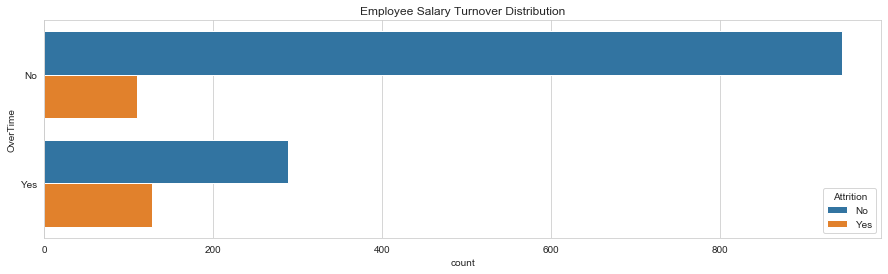

In [48]:
f, ax = plt.subplots(figsize=(15, 4))
sb.countplot(y="OverTime", hue='Attrition', data=df).set_title('Employee Salary Turnover Distribution');

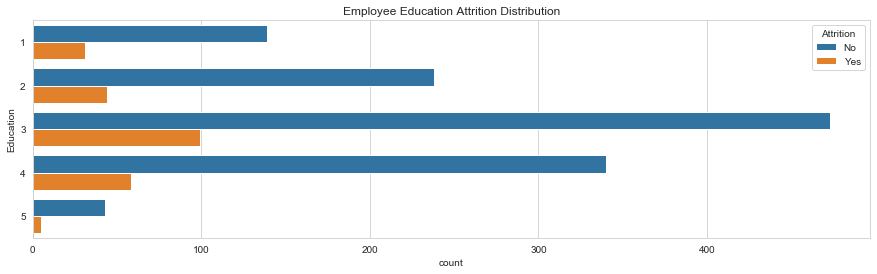

In [49]:
f, ax = plt.subplots(figsize=(15, 4))
sb.countplot(y="Education", hue='Attrition', data=df).set_title('Employee Education Attrition Distribution');

### 1.3 Pairwise correlations and eventual elimination of redundant variables

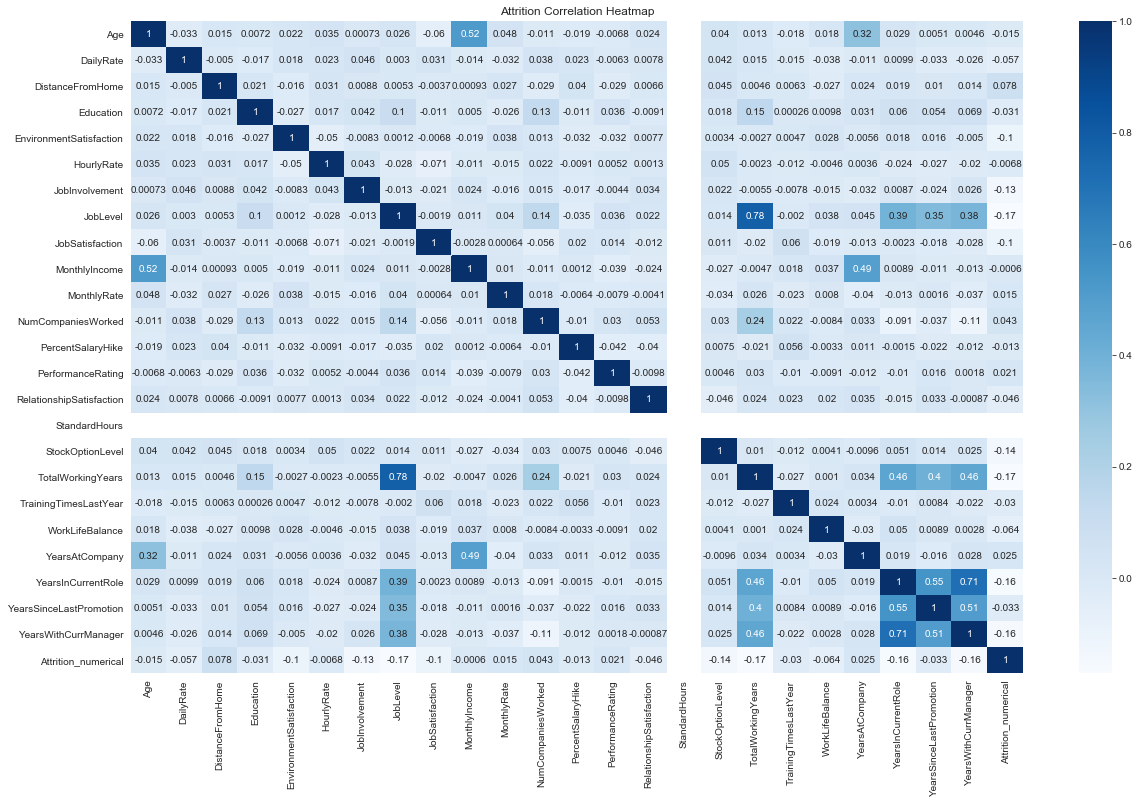

In [50]:
#Correlation Matrix
corr = df.corr()

corr_matrix = df.corr()
f , ax = plt.subplots(figsize=(20,12))
ax.set_title("Attrition Correlation Heatmap")
sb.heatmap(corr_matrix,vmax=1.0,cmap='Blues', annot=True)


Strongly correlated attributes:
-YearsInCurrentRole with YearsWithCurrManager (0.71);
-JobLevel with TotalWorkingYears (0.78);
-YearsInCurrentRole with YearsSinceLastPromotion (0.55).

In [51]:
# Since these are highly correlated, drop one of the features for each pair
df_cleaned.drop(['YearsWithCurrManager', 'TotalWorkingYears', 'YearsSinceLastPromotion'], axis=1, inplace=True)

In [52]:
df_cleaned.drop(['DailyRate', 'HourlyRate',  'MonthlyRate'], axis=1, inplace=True)

### 1.3 Assessing data quality (missing values, outliers)

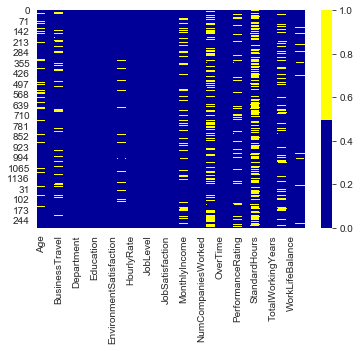

In [53]:
#Visualize the missing data patterns
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sb.heatmap(df[cols].isnull(), cmap=sb.color_palette(colours))

In [54]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_cleaned.columns:
    pct_missing = np.mean(df_cleaned[col].isnull())
    print('{}\t - {}%'.format(col, round(pct_missing*100)))

Age	 - 14.0%
Attrition	 - 0.0%
BusinessTravel	 - 9.0%
Department	 - 0.0%
DistanceFromHome	 - 0.0%
Education	 - 0.0%
EducationField	 - 0.0%
EnvironmentSatisfaction	 - 0.0%
Gender	 - 5.0%
JobInvolvement	 - 0.0%
JobLevel	 - 0.0%
JobRole	 - 0.0%
JobSatisfaction	 - 0.0%
MaritalStatus	 - 0.0%
MonthlyIncome	 - 19.0%
NumCompaniesWorked	 - 0.0%
Over18	 - 32.0%
OverTime	 - 0.0%
PercentSalaryHike	 - 0.0%
PerformanceRating	 - 12.0%
RelationshipSatisfaction	 - 0.0%
StandardHours	 - 49.0%
StockOptionLevel	 - 0.0%
TrainingTimesLastYear	 - 20.0%
WorkLifeBalance	 - 0.0%
YearsAtCompany	 - 5.0%
YearsInCurrentRole	 - 0.0%


### Dropping columns that give no new information

In [55]:
# The minimum of Age is 18 
#The mean and all the values are 80
df_cleaned.drop(['Over18', 'StandardHours'], axis=1, inplace=True)

### Outlier detection

In [57]:
column= ['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
        'TrainingTimesLastYear',  'YearsInCurrentRole', 'YearsAtCompany' ]

for col in column:
    z = np.abs(stats.zscore(df_cleaned[col]))
    print(col, np.where(z > 3))
    

Age (array([], dtype=int64),)
DistanceFromHome (array([], dtype=int64),)
MonthlyIncome (array([], dtype=int64),)
NumCompaniesWorked (array([], dtype=int64),)
PercentSalaryHike (array([], dtype=int64),)
PerformanceRating (array([], dtype=int64),)
TrainingTimesLastYear (array([], dtype=int64),)
YearsInCurrentRole (array([  75,  113,  194,  341,  431,  450,  582,  603,  762, 1025, 1182,
       1218, 1464]),)
YearsAtCompany (array([], dtype=int64),)


/Users/elisapashku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in greater



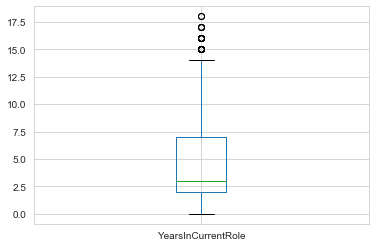

In [58]:
df.boxplot(column=['YearsInCurrentRole'])

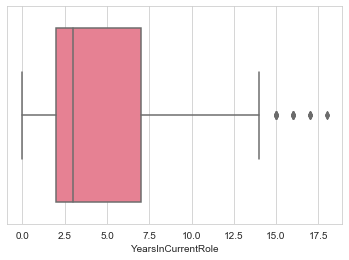

In [59]:
sb.boxplot(x=df['YearsInCurrentRole'], palette="husl")

### Fill the missing values 

In [60]:
df_cleaned.isnull().sum()

Age                         212
Attrition                     0
BusinessTravel              131
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       75
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               280
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating           172
RelationshipSatisfaction      0
StockOptionLevel              0
TrainingTimesLastYear       292
WorkLifeBalance               0
YearsAtCompany               74
YearsInCurrentRole            0
dtype: int64

### a) Age

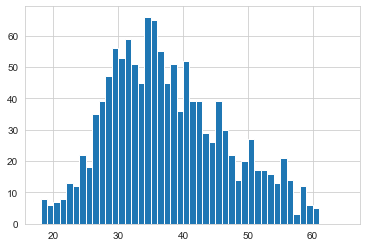

In [61]:
df_cleaned['Age'].hist(bins=np.arange(18, 66, 1))

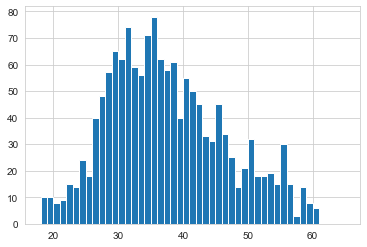

In [63]:
fill = df_cleaned['Age'].value_counts(normalize=True)
missing = df_cleaned['Age'].isnull()
df_cleaned.loc[missing,'Age'] = np.random.choice(fill.index, size=len(df_cleaned[missing]),p=fill.values)
df_cleaned['Age'].hist(bins=np.arange(18, 66, 1))

### b) BusinessTravel

Travel_Rarely        947
Travel_Frequently    254
Non-Travel           138
Name: BusinessTravel, dtype: int64

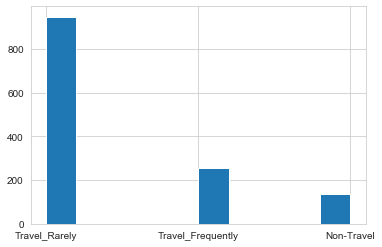

In [64]:
df_cleaned['BusinessTravel'].hist()
df_cleaned['BusinessTravel'].value_counts()

Travel_Rarely        1055
Travel_Frequently     267
Non-Travel            148
Name: BusinessTravel, dtype: int64

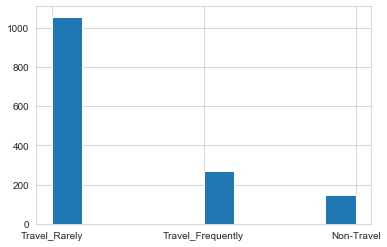

In [70]:
fill = df_cleaned['BusinessTravel'].value_counts(normalize=True)
missing = df_cleaned['BusinessTravel'].isnull()
df_cleaned.loc[missing,'BusinessTravel'] = np.random.choice(fill.index, size=len(df_cleaned[missing]),p=fill.values)
df_cleaned['BusinessTravel'].hist()
df_cleaned['BusinessTravel'].value_counts()

### c) Gender

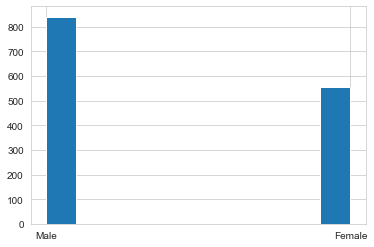

In [71]:
df_cleaned['Gender'].hist()

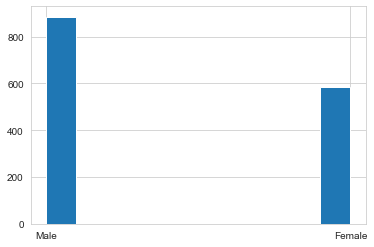

In [72]:
fill = df_cleaned['Gender'].value_counts(normalize=True)
missing = df_cleaned['Gender'].isnull()
df_cleaned.loc[missing,'Gender'] = np.random.choice(fill.index, size=len(df_cleaned[missing]),p=fill.values)
df_cleaned['Gender'].hist()

### e) PerformanceRating

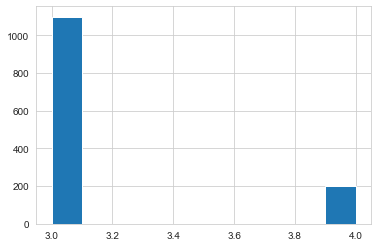

In [73]:
df_cleaned['PerformanceRating'].hist()

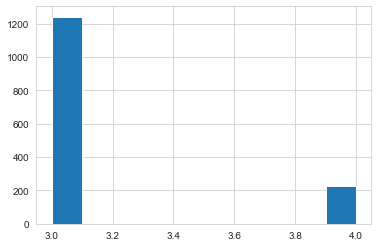

In [74]:
fill = df_cleaned['PerformanceRating'].value_counts(normalize=True)
missing = df_cleaned['PerformanceRating'].isnull()
df_cleaned.loc[missing,'PerformanceRating'] = np.random.choice(fill.index, size=len(df_cleaned[missing]),p=fill.values)
df_cleaned['PerformanceRating'].hist()

### f) TrainingTimesLastYear

In [75]:
fill = df_cleaned['TrainingTimesLastYear'].value_counts(normalize=True)
missing = df_cleaned['TrainingTimesLastYear'].isnull()
df_cleaned.loc[missing,'TrainingTimesLastYear'] = np.random.choice(fill.index, size=len(df_cleaned[missing]),p=fill.values)

### g) YearsAtCompany

In [76]:
fill = df_cleaned['YearsAtCompany'].value_counts(normalize=True)
missing = df_cleaned['YearsAtCompany'].isnull()
df_cleaned.loc[missing,'YearsAtCompany'] = np.random.choice(fill.index, size=len(df_cleaned[missing]),p=fill.values)

### h) MonthlyIncome

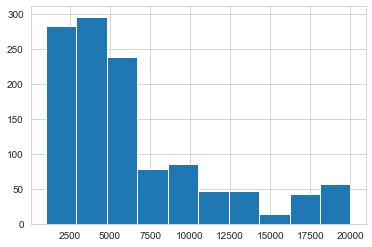

In [77]:
df_cleaned['MonthlyIncome'].hist()

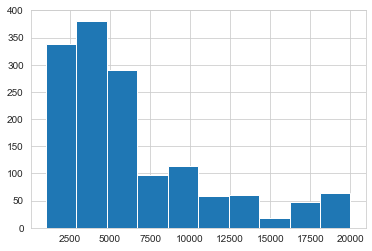

In [78]:
fill = df_cleaned['MonthlyIncome'].value_counts(normalize=True)
missing = df_cleaned['MonthlyIncome'].isnull()
df_cleaned.loc[missing,'MonthlyIncome'] = np.random.choice(fill.index, size=len(df_cleaned[missing]),p=fill.values)
df_cleaned['MonthlyIncome'].hist()

In [81]:
#Use Z scores for identifying the outliers
column= ['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole' ]

 

for col in column:
    z = np.abs(stats.zscore(df_cleaned[col]))
    threshold = 3
    
    print(col,np.where(z > 3))

Age (array([], dtype=int64),)
DistanceFromHome (array([], dtype=int64),)
MonthlyIncome (array([], dtype=int64),)
NumCompaniesWorked (array([], dtype=int64),)
PercentSalaryHike (array([], dtype=int64),)
PerformanceRating (array([], dtype=int64),)
TrainingTimesLastYear (array([], dtype=int64),)
YearsAtCompany (array([  12,   38,   57,  205,  336,  355,  360,  388,  408,  524,  598,
        766,  921,  924,  933,  971,  987, 1115, 1157, 1201, 1217, 1427]),)
YearsInCurrentRole (array([  75,  113,  194,  341,  431,  450,  582,  603,  762, 1025, 1182,
       1218, 1464]),)


In [82]:
df_final = df_cleaned[(z<3)]

In [84]:
df_final.to_csv('/Users/elisapashku/Desktop/Pisa/DMProject/df_final.csv')